# Assignment 6: Urban Street Networks and Interactive Web Maps

Jack Rummler | MUSA550 | Nov. 23, 2022

## Part 1: Visualizing crash data in Philadelphia

### 1.1 Load the geometry for the region being analyzed

In [140]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np

In [141]:
# Using Open Data Philly, I extracted the different districts of Philadelphia, and will use Central as a rough boundary for Center City.

districts = "http://data.phl.opendata.arcgis.com/datasets/0960ea0f38f44146bb562f2b212075aa_0.geojson"
phl = gpd.read_file(districts)
phl.head()

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry
0,1,14,River Wards,RW,2.107270e+08,66931.595020,None,None,"POLYGON ((-75.09798 40.00496, -75.09687 40.005..."
1,2,3,North Delaware,NDEL,2.700915e+08,89213.074378,None,None,"POLYGON ((-74.98159 40.05363, -74.98139 40.053..."
2,3,0,Lower Far Northeast,LFNE,3.068529e+08,92703.285159,None,None,"POLYGON ((-74.96443 40.11728, -74.96434 40.117..."
3,4,9,Central,CTR,1.782880e+08,71405.143450,None,None,"POLYGON ((-75.14791 39.96733, -75.14715 39.967..."
4,5,10,University Southwest,USW,1.296468e+08,65267.676141,None,None,"POLYGON ((-75.18742 39.96338, -75.18644 39.963..."


In [142]:
sel = phl['DIST_NAME'].isin(['Central'])
central = phl.loc[sel]
central

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry
3,4,9,Central,CTR,1.782880e+08,71405.14345,None,None,"POLYGON ((-75.14791 39.96733, -75.14715 39.967..."


In [143]:
central_geom = central.geometry[3]
type(central_geom)

shapely.geometry.polygon.Polygon

### 1.2 Get the street network graph

Street Network - Center City, Philadelphia, PA


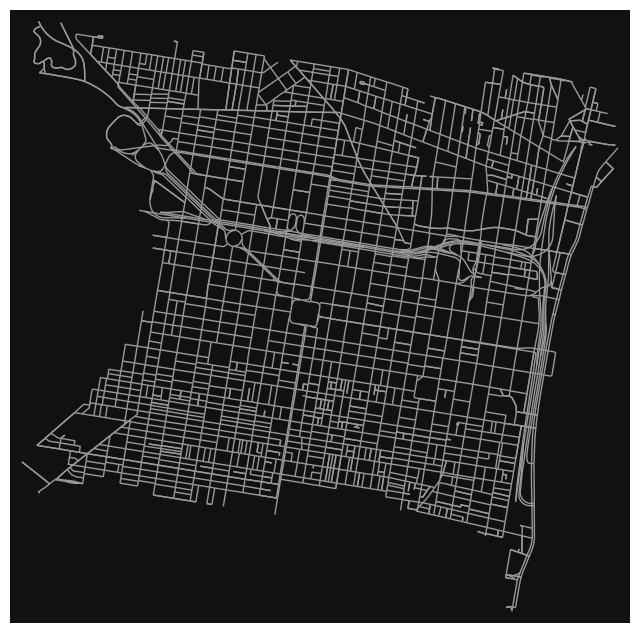

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [147]:
print("Street Network - Center City, Philadelphia, PA")
G = ox.graph_from_polygon(central_geom, network_type='drive')
ox.plot_graph(G, node_size=0) # Visualizing Center City

### 1.3 Convert your network graph edges to a GeoDataFrame

In [148]:
edges = ox.graph_to_gdfs(G, edges=True, nodes=False) # Extracting geometries of the street network and turning them into a gdf
edges.head() 

osmid  oneway                   name  \
u         v         key                                             
109727439 109911666 0    132508434    True      Bainbridge Street   
109727448 109727439 0     12109011    True  South Colorado Street   
          110034229 0     12159387    True       Fitzwater Street   
109727507 110024052 0    193364514    True       Carpenter Street   
109728761 110274344 0    672312336    True           Brown Street   

                             highway reversed   length  \
u         v         key                                  
109727439 109911666 0    residential    False   44.137   
109727448 109727439 0    residential    False  109.484   
          110034229 0    residential    False   91.353   
109727507 110024052 0    residential    False   53.208   
109728761 110274344 0    residential    False   58.270   

                                                                  geometry  \
u         v         key                                                      
109727439 109911666 0    LINESTRING (-75.17104 39.94345, -75.17053 39.9...   
109727448 109727439 0    LINESTRING (-75.17125 39.94248, -75.17120 39.9...   
          110034229 0    LINESTRING (-75.17125 39.94248, -75.17137 39.9...   
109727507 110024052 0    LINESTRING (-75.17196 39.93973, -75.17134 39.9...   
109728761 110274344 0    LINESTRING (-75.17317 39.96951, -75.17250 39.9...   

                        lanes maxspeed tunnel bridge  ref width service  \
u         v         key                                                   
109727439 109911666 0     NaN      NaN    NaN    NaN  NaN   NaN     NaN   
109727448 109727439 0     NaN      NaN    NaN    NaN  NaN   NaN     NaN   
          110034229 0     NaN      NaN    NaN    NaN  NaN   NaN     NaN   
109727507 110024052 0     NaN      NaN    NaN    NaN  NaN   NaN     NaN   
109728761 110274344 0     NaN      NaN    NaN    NaN  NaN   NaN     NaN   

                        access junction  
u         v         key                  
109727439 109911666 0      NaN      NaN  
109727448 109727439 0      NaN      NaN  
          110034229 0      NaN      NaN  
109727507 110024052 0      NaN      NaN  
109728761 110274344 0      NaN      NaN

### 1.4 Load PennDOT crash data

In [149]:
crash = pd.read_csv("./data/CRASH_PHILADELPHIA_2021.csv") # 2021 crash data, Source: Open Data Philly
crash.head()

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,WZ_WORKERS_INJ_KILLED,SECONDARY_CRASH,INTERSECTION_RELATED
0,1646.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,1710.0,3,3.0,NaN,N,N
1,1650.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5.0,3,3.0,NaN,N,N
2,1703.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,N,NaN
3,1238.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,N,N
4,1152.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,N,N


### 1.5 Convert the crash data to a GeoDataFrame

In [150]:
crashgeo = gpd.GeoDataFrame(
crash,
geometry = gpd.points_from_xy(crash.DEC_LONG, crash.DEC_LAT),
crs="epsg:4326")
crashgeo.head() # Turning dataframe into geodataframe

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,WZ_WORKERS_INJ_KILLED,SECONDARY_CRASH,INTERSECTION_RELATED,geometry
0,1646.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1710.0,3,3.0,NaN,N,N,POINT (-75.19130 40.00820)
1,1650.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,5.0,3,3.0,NaN,N,N,POINT (-75.19360 39.94240)
2,1703.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,N,NaN,POINT (-75.19210 39.95280)
3,1238.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,N,N,POINT (-75.08820 39.98890)
4,1152.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,N,N,POINT (-75.21200 39.88610)


### 1.6 Trim the crash data to Center City

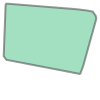

In [151]:
cc_edges = edges.unary_union.convex_hull # Unioning geometries
cc_edges

In [152]:
crashcc = crashgeo[crashgeo.within(cc_edges)] # Extracting Center City geometries
crashcc.head()

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,WZ_WORKERS_INJ_KILLED,SECONDARY_CRASH,INTERSECTION_RELATED,geometry
9,1236.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1333.0,3,NaN,NaN,N,N,POINT (-75.18070 39.95970)
13,602.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,3.0,NaN,N,N,POINT (-75.14910 39.95490)
31,1717.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,10,NaN,NaN,N,N,POINT (-75.18240 39.95160)
36,738.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,3.0,NaN,N,NaN,POINT (-75.14570 39.95760)
38,2020.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,3.0,NaN,Y,NaN,POINT (-75.16330 39.95340)


### 1.7 Re-project our data into an approriate CRS

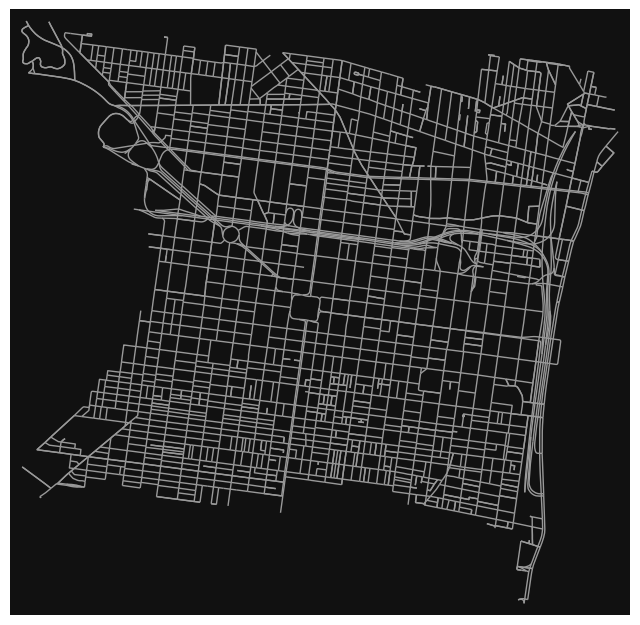

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [153]:
G_proj = ox.project_graph(G, to_crs="epsg:2272")
ox.plot_graph(G_proj, node_size=0)

In [154]:
crashcc2 = crashcc.to_crs("epsg:2272")

### 1.8 Find the nearest edge for each crash

In [155]:
crash_x = crashcc2.geometry.x
crash_y = crashcc2.geometry.y

In [156]:
nearest_edges = ox.distance.nearest_edges(G_proj, crash_x, crash_y)

### 1.9 Calculate the total number of crashes per street

In [157]:
df = pd.DataFrame(nearest_edges, columns=['u', 'v', 'key'])
df

,u,v,key
0,8482829382,7065714513,0
1,7384791791,775424603,0
2,2043885897,5879856051,0
3,109739559,110225812,0
4,110402209,110416548,0
...,...,...,...
1287,5562239293,1888418037,0
1288,109799565,109799300,0
1289,109784213,109789845,0
1290,7738709997,1479201367,0


In [158]:
total_crash = df.groupby(['u', 'v']).size().reset_index(name='Crash_Count')
total_crash # Determining crash counts

,u,v,Crash_Count
0,109729474,3425014859,2
1,109729486,109729699,1
2,109729486,110342146,2
3,109729699,109811674,2
4,109729709,109729731,3
...,...,...,...
485,7738709997,1479201367,2
486,8482829382,7065714513,69
487,8553549495,109811783,1
488,9244049904,634779465,2


### 1.10 Merge your edges GeoDataFrame and crash count DataFrame

In [160]:
edgemerge = edges.merge(total_crash, on=['u', 'v'], how='left')
edgemerge

,u,v,osmid,oneway,name,highway,reversed,length,geometry,lanes,maxspeed,tunnel,bridge,ref,width,service,access,junction,Crash_Count
0,109727439,109911666,132508434,True,Bainbridge Street,residential,False,44.137,"LINESTRING (-75.17104 39.94345, -75.17053 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109727448,109727439,12109011,True,South Colorado Street,residential,False,109.484,"LINESTRING (-75.17125 39.94248, -75.17120 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109727448,110034229,12159387,True,Fitzwater Street,residential,False,91.353,"LINESTRING (-75.17125 39.94248, -75.17137 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109727507,110024052,193364514,True,Carpenter Street,residential,False,53.208,"LINESTRING (-75.17196 39.93973, -75.17134 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109728761,110274344,672312336,True,Brown Street,residential,False,58.270,"LINESTRING (-75.17317 39.96951, -75.17250 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,10131978091,109893257,62153768,True,Florist Street,residential,False,29.820,"LINESTRING (-75.14316 39.95428, -75.14282 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3924,10131978091,10131978090,1107306685,False,NaN,unclassified,True,8.061,"LINESTRING (-75.14316 39.95428, -75.14319 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3925,10132121779,10132121780,1107321326,False,NaN,unclassified,False,36.512,"LINESTRING (-75.13649 39.96783, -75.13607 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3926,10132121780,10132121779,1107321326,False,NaN,unclassified,True,36.512,"LINESTRING (-75.13607 39.96775, -75.13649 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.11 Calculate a "Crash Index"

In [163]:
edgemerge['Crash_Count'] = edgemerge['Crash_Count'].fillna(0)
edgemerge

,u,v,osmid,oneway,name,highway,reversed,length,geometry,lanes,maxspeed,tunnel,bridge,ref,width,service,access,junction,Crash_Count,crash_per_length
0,109727439,109911666,132508434,True,Bainbridge Street,residential,False,44.137,"LINESTRING (-75.17104 39.94345, -75.17053 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,109727448,109727439,12109011,True,South Colorado Street,residential,False,109.484,"LINESTRING (-75.17125 39.94248, -75.17120 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,109727448,110034229,12159387,True,Fitzwater Street,residential,False,91.353,"LINESTRING (-75.17125 39.94248, -75.17137 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,109727507,110024052,193364514,True,Carpenter Street,residential,False,53.208,"LINESTRING (-75.17196 39.93973, -75.17134 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,109728761,110274344,672312336,True,Brown Street,residential,False,58.270,"LINESTRING (-75.17317 39.96951, -75.17250 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,10131978091,109893257,62153768,True,Florist Street,residential,False,29.820,"LINESTRING (-75.14316 39.95428, -75.14282 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3924,10131978091,10131978090,1107306685,False,NaN,unclassified,True,8.061,"LINESTRING (-75.14316 39.95428, -75.14319 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3925,10132121779,10132121780,1107321326,False,NaN,unclassified,False,36.512,"LINESTRING (-75.13649 39.96783, -75.13607 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3926,10132121780,10132121779,1107321326,False,NaN,unclassified,True,36.512,"LINESTRING (-75.13607 39.96775, -75.13649 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [164]:
edgemerge['crash_per_length'] = edgemerge['Crash_Count'] / edgemerge['length']
edgemerge

,u,v,osmid,oneway,name,highway,reversed,length,geometry,lanes,maxspeed,tunnel,bridge,ref,width,service,access,junction,Crash_Count,crash_per_length
0,109727439,109911666,132508434,True,Bainbridge Street,residential,False,44.137,"LINESTRING (-75.17104 39.94345, -75.17053 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,109727448,109727439,12109011,True,South Colorado Street,residential,False,109.484,"LINESTRING (-75.17125 39.94248, -75.17120 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,109727448,110034229,12159387,True,Fitzwater Street,residential,False,91.353,"LINESTRING (-75.17125 39.94248, -75.17137 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,109727507,110024052,193364514,True,Carpenter Street,residential,False,53.208,"LINESTRING (-75.17196 39.93973, -75.17134 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,109728761,110274344,672312336,True,Brown Street,residential,False,58.270,"LINESTRING (-75.17317 39.96951, -75.17250 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,10131978091,109893257,62153768,True,Florist Street,residential,False,29.820,"LINESTRING (-75.14316 39.95428, -75.14282 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3924,10131978091,10131978090,1107306685,False,NaN,unclassified,True,8.061,"LINESTRING (-75.14316 39.95428, -75.14319 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3925,10132121779,10132121780,1107321326,False,NaN,unclassified,False,36.512,"LINESTRING (-75.13649 39.96783, -75.13607 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3926,10132121780,10132121779,1107321326,False,NaN,unclassified,True,36.512,"LINESTRING (-75.13607 39.96775, -75.13649 39.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [165]:
abovezero = edgemerge['Crash_Count'] > 0
log = np.log10(edgemerge.loc[abovezero]['crash_per_length'])

In [166]:
edgemerge['crash_index'] = (log - log.min()) / (log.max() - log.min())
edgemerge

,u,v,osmid,oneway,name,highway,reversed,length,geometry,lanes,...,tunnel,bridge,ref,width,service,access,junction,Crash_Count,crash_per_length,crash_index
0,109727439,109911666,132508434,True,Bainbridge Street,residential,False,44.137,"LINESTRING (-75.17104 39.94345, -75.17053 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,109727448,109727439,12109011,True,South Colorado Street,residential,False,109.484,"LINESTRING (-75.17125 39.94248, -75.17120 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,109727448,110034229,12159387,True,Fitzwater Street,residential,False,91.353,"LINESTRING (-75.17125 39.94248, -75.17137 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,109727507,110024052,193364514,True,Carpenter Street,residential,False,53.208,"LINESTRING (-75.17196 39.93973, -75.17134 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,109728761,110274344,672312336,True,Brown Street,residential,False,58.270,"LINESTRING (-75.17317 39.96951, -75.17250 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,10131978091,109893257,62153768,True,Florist Street,residential,False,29.820,"LINESTRING (-75.14316 39.95428, -75.14282 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3924,10131978091,10131978090,1107306685,False,NaN,unclassified,True,8.061,"LINESTRING (-75.14316 39.95428, -75.14319 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3925,10132121779,10132121780,1107321326,False,NaN,unclassified,False,36.512,"LINESTRING (-75.13649 39.96783, -75.13607 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3926,10132121780,10132121779,1107321326,False,NaN,unclassified,True,36.512,"LINESTRING (-75.13607 39.96775, -75.13649 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


### 1.12 Plot a histogram of the crash index values

In [167]:
from matplotlib import pyplot as plt
%matplotlib inline

In [168]:
edgemerge['crash_index'] = edgemerge['crash_index'].fillna(0)
edgemerge

,u,v,osmid,oneway,name,highway,reversed,length,geometry,lanes,...,tunnel,bridge,ref,width,service,access,junction,Crash_Count,crash_per_length,crash_index
0,109727439,109911666,132508434,True,Bainbridge Street,residential,False,44.137,"LINESTRING (-75.17104 39.94345, -75.17053 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,109727448,109727439,12109011,True,South Colorado Street,residential,False,109.484,"LINESTRING (-75.17125 39.94248, -75.17120 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,109727448,110034229,12159387,True,Fitzwater Street,residential,False,91.353,"LINESTRING (-75.17125 39.94248, -75.17137 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,109727507,110024052,193364514,True,Carpenter Street,residential,False,53.208,"LINESTRING (-75.17196 39.93973, -75.17134 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,109728761,110274344,672312336,True,Brown Street,residential,False,58.270,"LINESTRING (-75.17317 39.96951, -75.17250 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,10131978091,109893257,62153768,True,Florist Street,residential,False,29.820,"LINESTRING (-75.14316 39.95428, -75.14282 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3924,10131978091,10131978090,1107306685,False,NaN,unclassified,True,8.061,"LINESTRING (-75.14316 39.95428, -75.14319 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3925,10132121779,10132121780,1107321326,False,NaN,unclassified,False,36.512,"LINESTRING (-75.13649 39.96783, -75.13607 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3926,10132121780,10132121779,1107321326,False,NaN,unclassified,True,36.512,"LINESTRING (-75.13607 39.96775, -75.13649 39.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


Text(0, 0.5, 'Count of Crashes')

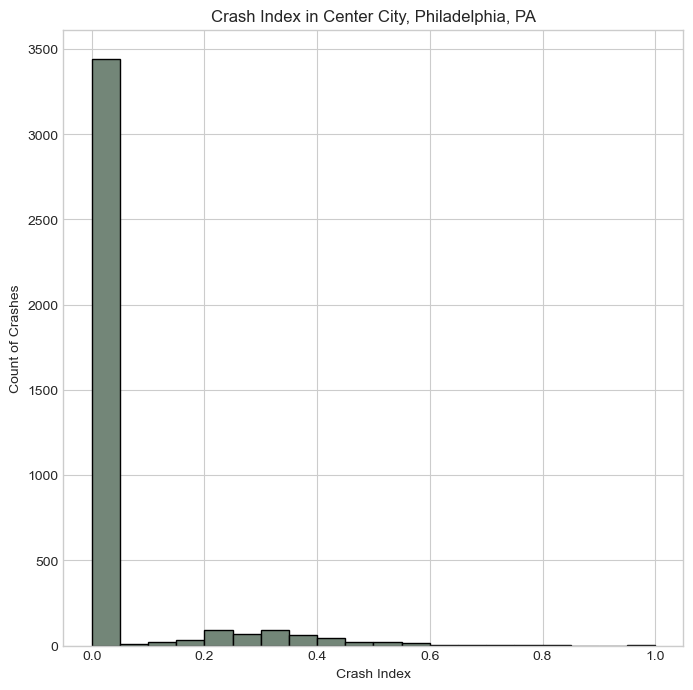

In [169]:
fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('seaborn-whitegrid')

ax.hist(edgemerge['crash_index'],
       bins=20,
       color='#738678',
       edgecolor='black')

plt.title('Crash Index in Center City, Philadelphia, PA')
plt.xlabel('Crash Index')
plt.ylabel('Count of Crashes')

### 1.13 Plot the street networks, colored by the crash index

In [170]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium
import matplotlib.colors as mcolors

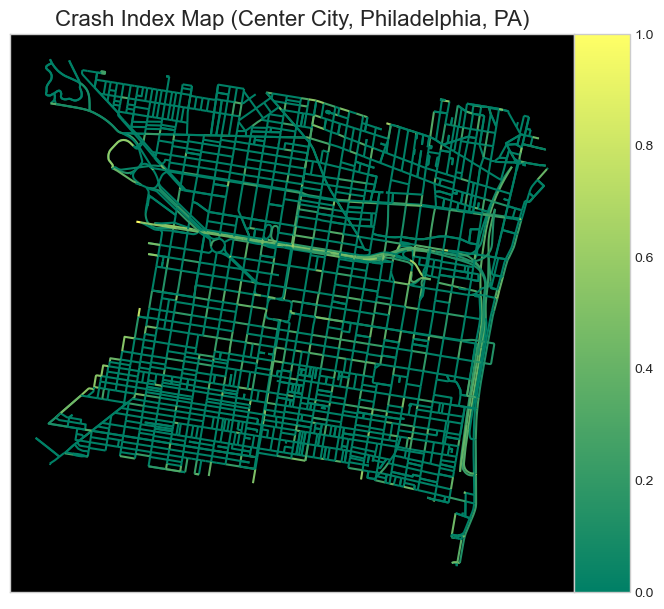

In [171]:
fig, ax = plt.subplots(figsize=(8,8))

scaled_ax = make_axes_locatable(ax)
cax = scaled_ax.append_axes("right", size="10%", pad=0)

newedge = edgemerge.to_crs(epsg=3857)
ax = newedge.plot(ax=ax, cax=cax,
            column='crash_index',
            cmap='summer',
            legend=True)

ax.set_title('Crash Index Map (Center City, Philadelphia, PA)', fontsize=16)
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect("equal")

plt.savefig('map.png', dpi=300)

### 1.14 An interactive map of the crash index

In [172]:
import folium

In [173]:
cmap = plt.get_cmap("summer")

def get_crash_style(features):
    """
    Get a style dict.
    """
    val = features["properties"]["crash_index"]

    if val is None:
        val = 0

    # Get the color as a hex string
    rgb_color = cmap(val)
    color = mcolors.rgb2hex(rgb_color)

    # Return the style dictionary
    return {"color": color, "weight": 1.75}

In [174]:
m = folium.Map(location=[39.95, -75.15], tiles='Cartodb dark_matter', zoom_start=12)

vars_to_json = edgemerge[['geometry', 'name', 'crash_index']].to_json()

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Crash Map Index - Center City, Philadelphia, PA</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

folium.GeoJson(
    data=vars_to_json,
    style_function=get_crash_style,
    tooltip=folium.GeoJsonTooltip(['name', 'crash_index'],
    legend_name="Crash Index")).add_to(m)

m

## Part 2: Interactive web maps with Folium: Fatal Shootings in Philadelphia (2021)


In [175]:
import carto2gpd
from folium.plugins import HeatMap

In [176]:
api_url = "https://phl.carto.com/api/v2/sql"

table_name = "shootings"

In [177]:
where = f"fatal = '1' AND year = '2021'"
where

"fatal = '1' AND year = '2021'"

In [178]:
fatal2021 = carto2gpd.get(api_url, table_name, where=where) # API access statement
fatal2021 = fatal2021.loc[fatal2021.geometry.notnull()] 
fatal2021

,geometry,cartodb_id,objectid,year,dc_key,code,date_,time,race,sex,...,offender_injured,offender_deceased,location,latino,point_x,point_y,dist,inside,outside,fatal
0,POINT (-75.15125 40.01035),2,7564240,2021,202139054233.0,111,2021-10-09T00:00:00Z,22:19:00,B,M,...,N,N,3700 BLOCK GERMANTOWN AVE,0,-75.151252,40.010352,39,0,1,1
1,POINT (-75.15015 40.01534),10,7564248,2021,202139055178.0,111,2021-10-14T00:00:00Z,20:31:00,B,M,...,N,N,1400 BLOCK W LYCOMING ST,0,-75.150148,40.015336,39,0,1,1
2,POINT (-75.17013 39.99912),18,7564256,2021,202139060890.0,111,2021-11-12T00:00:00Z,19:36:00,B,M,...,N,N,2400 BLOCK W CAMBRIA ST,0,-75.170126,39.999116,39,0,1,1
3,POINT (-75.15338 40.00097),23,7564261,2021,202139065392.0,111,2021-12-10T00:00:00Z,17:50:00,W,M,...,N,N,3100 BLOCK N BROAD ST APT 3,0,-75.153384,40.000974,39,1,0,1
4,POINT (-75.17894 40.01088),24,7564262,2021,202139065994.0,111,2021-12-14T00:00:00Z,11:34:00,B,M,...,N,N,3200 BLOCK DEFENSE TERR,0,-75.178940,40.010880,39,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,POINT (-75.12162 39.98876),12114,7563368,2021,202124028200.0,111,2021-05-01T00:00:00Z,21:56:00,W,M,...,N,N,2000 BLOCK E SILVER ST,0,-75.121622,39.988757,24,0,1,1
504,POINT (-75.12663 39.99347),12120,7563374,2021,202124043286.0,111,2021-06-28T00:00:00Z,16:22:00,B,F,...,N,N,200 BLOCK E CAMBRIA ST,0,-75.126626,39.993472,24,0,1,1
505,POINT (-75.22741 39.95059),12125,7562705,2021,202118001818.0,111,2021-01-10T00:00:00Z,14:43:00,B,M,...,N,N,5200 BLOCK CEDAR AVE,0,-75.227414,39.950587,18,0,1,1
506,POINT (-75.22514 39.95516),12136,7562716,2021,202118022222.0,111,2021-05-07T00:00:00Z,16:39:00,B,M,...,N,N,5100 BLOCK IRVING ST,0,-75.225138,39.955159,18,0,1,1


In [179]:
fatal2021['lat'] = fatal2021.geometry.y
fatal2021['lng'] = fatal2021.geometry.x

coords = fatal2021[['lat', 'lng']].values

In [180]:
from folium import plugins

m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb Positron',
    zoom_start=11)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Fatal Shootings - Philadelphia, PA (2021)</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))


HeatMap(coords).add_to(m)

m